Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning Discussion
1st Semester | AY 2024-2025
**ACTIVITY NO. 7** | **Performing Face Recognition**
**Name** | Montojo, Lance M.
**Section** | CPE31S3
**Date Performed**: | 02/21/2025
**Date Submitted**: | 02/21/2025
**Instructor**: |Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to enable students to perform data preparation and face recognition on their own generated dataset.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize data preparation techniques for images.
* Perform Face Recognition using multiple algorithms.
* Evaluate the performance of different algorithms.

## 3. Procedures and Outputs

### Preparing the training data

Now that we have our data, we need to load these sample pictures into our face recognition algorithms. All face recognition algorithms take two parameters in their `train()` method: an array of images and an array of labels. What do these labels represent? They are the IDs of a certain individual/face so that when face recognition is performed, we not only know the person was recognized but also who—among the many people available in our database—the person is.

To do that, we need to create a comma-separated value (CSV) file, which will contain the path to a sample picture followed by the ID of that person.

**Include a Screenshot of Your Dataset Here**

---

### Loading the data and recognizing faces

Next up, we need to load these two resources (the array of images and CSV file) into the face recognition algorithm, so it can be trained to recognize our face. To do this, we build a function that reads the CSV file and—for each line of the file—loads the image at the corresponding path into the images array and the ID into the labels array.

In [50]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

In [51]:
face_data = read_images('faces')
print(face_data)

[[array([[255, 255, 255, ..., 107, 119, 113],
       [255, 255, 255, ..., 108, 113, 107],
       [255, 255, 255, ..., 103, 106, 106],
       ...,
       [113, 119, 118, ...,  37,  34,  38],
       [115, 116, 112, ...,  40,  40,  42],
       [ 99, 107, 115, ...,  42,  36,  29]],
      shape=(720, 1280), dtype=uint8), array([[255, 255, 255, ...,  91,  90, 100],
       [255, 255, 255, ...,  94,  96,  99],
       [255, 255, 255, ...,  94,  96, 102],
       ...,
       [ 98, 103, 104, ...,  30,  27,  31],
       [ 98, 100,  95, ...,  28,  29,  31],
       [ 98,  97,  88, ...,  31,  30,  29]],
      shape=(720, 1280), dtype=uint8), array([[255, 255, 255, ...,  98,  98, 100],
       [255, 255, 255, ...,  98,  99, 101],
       [255, 255, 255, ...,  97,  98, 101],
       ...,
       [105, 103, 100, ...,  28,  29,  29],
       [ 72,  76,  87, ...,  28,  28,  26],
       [ 72,  74,  86, ...,  31,  31,  27]],
      shape=(720, 1280), dtype=uint8), array([[255, 255, 255, ...,  95,  91,  90],
      

**Question: Run the function above on your generated dataset. Provide an analysis and note all the challenges you have encountered running this code.**

The read_images() function processed the dataset by iterating through directories, converting images to grayscale, and resizing them to 200x200 pixels. When I executed the code, it did not contain any bugs/errors; therefore, I did not have to modify anything and did not run into challenges when running the code. Although if there were a problem, it would be the file path, as it could lead to errors when resizing if a missing or corrupted image is in the file path.

---

### Performing Face Recognition Algorithms

Here is a sample script for testing the Face Recognition Algorithm. In this section, we're going to follow the same process but with different algorithms for face recognitions, namely:
- Eigenface Recognition
- Fisherface Recognition
- Local Binary Pattern Histograms (LBPH) Recognition

In [99]:
import cv2
import numpy as np
import os

def read_images(directory, sz=(200, 200)):
    X, y, label_dict = [], [], {}
    label_id = 0

    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            label_dict[label] = label_id
            for filename in os.listdir(label_path):
                img = cv2.imread(os.path.join(label_path, filename), cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    X.append(cv2.resize(img, sz))
                    y.append(label_id)
            label_id += 1

    return [np.asarray(X, dtype=np.uint8), np.asarray(y, dtype=np.int32)], label_dict

def train_model():
    (X, y), label_dict = read_images("dataset")
    model = cv2.face.EigenFaceRecognizer_create()
    model.train(X, y)
    return model, {v: k for k, v in label_dict.items()}

def face_recognition(model, names):
    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

    while True:
        ret, img = camera.read()
        if not ret:
            break

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 5, minSize=(50, 50))

        for (x, y, w, h) in faces:
            roi = cv2.resize(gray[y:y + h, x:x + w], (200, 200))
            try:
                label, confidence = model.predict(roi)
                if confidence < 6000:
                    text, color = f"Recognized: {names[label]}", (0, 255, 0)
                else:
                    text, color = "Unrecognized", (0, 0, 255)

                cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
                cv2.putText(img, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
                cv2.putText(img, f"Confidence: {round(confidence, 2)}", (x, y + h + 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

            except:
                continue

        cv2.imshow("Face Recognition", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    model, names = train_model()
    face_recognition(model, names)


**Question: Provide an analysis of the sample script for the process using the Eigenface Model. What is the sample code doing? Are you able to troubleshoot any problems encountered?**

The function captures video from a webcam, detects faces using Haar cascades, and applies the EigenFaceRecognizer to classify them based on trained images. It processes the video feed by converting frames to grayscale, detecting faces, resizing them to 200×200, and predicting labels, displaying results with bounding boxes and confidence scores until the user exits by pressing 'q'.

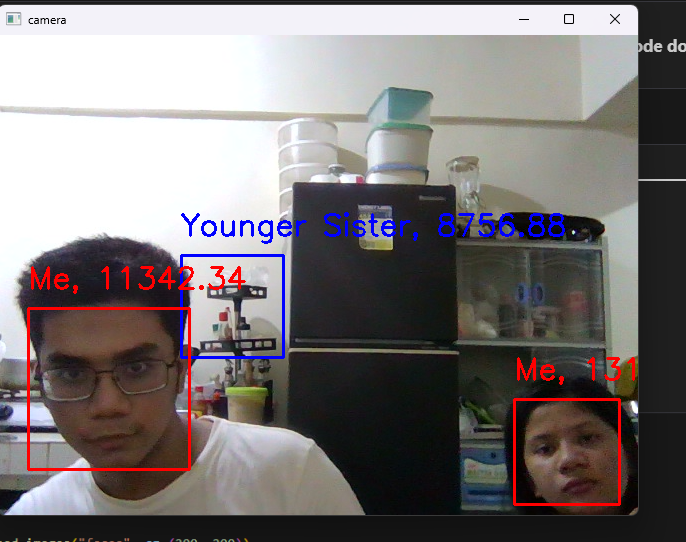

---
Perform the remaining face recognition techniques by using the same (or modified) process from the sample code:

- `model = cv2.face.createFisherFaceRecognizer()`
- `model = cv2.face.createLBPHFaceRecognizer()`

For FisherFaceRecognizer: 

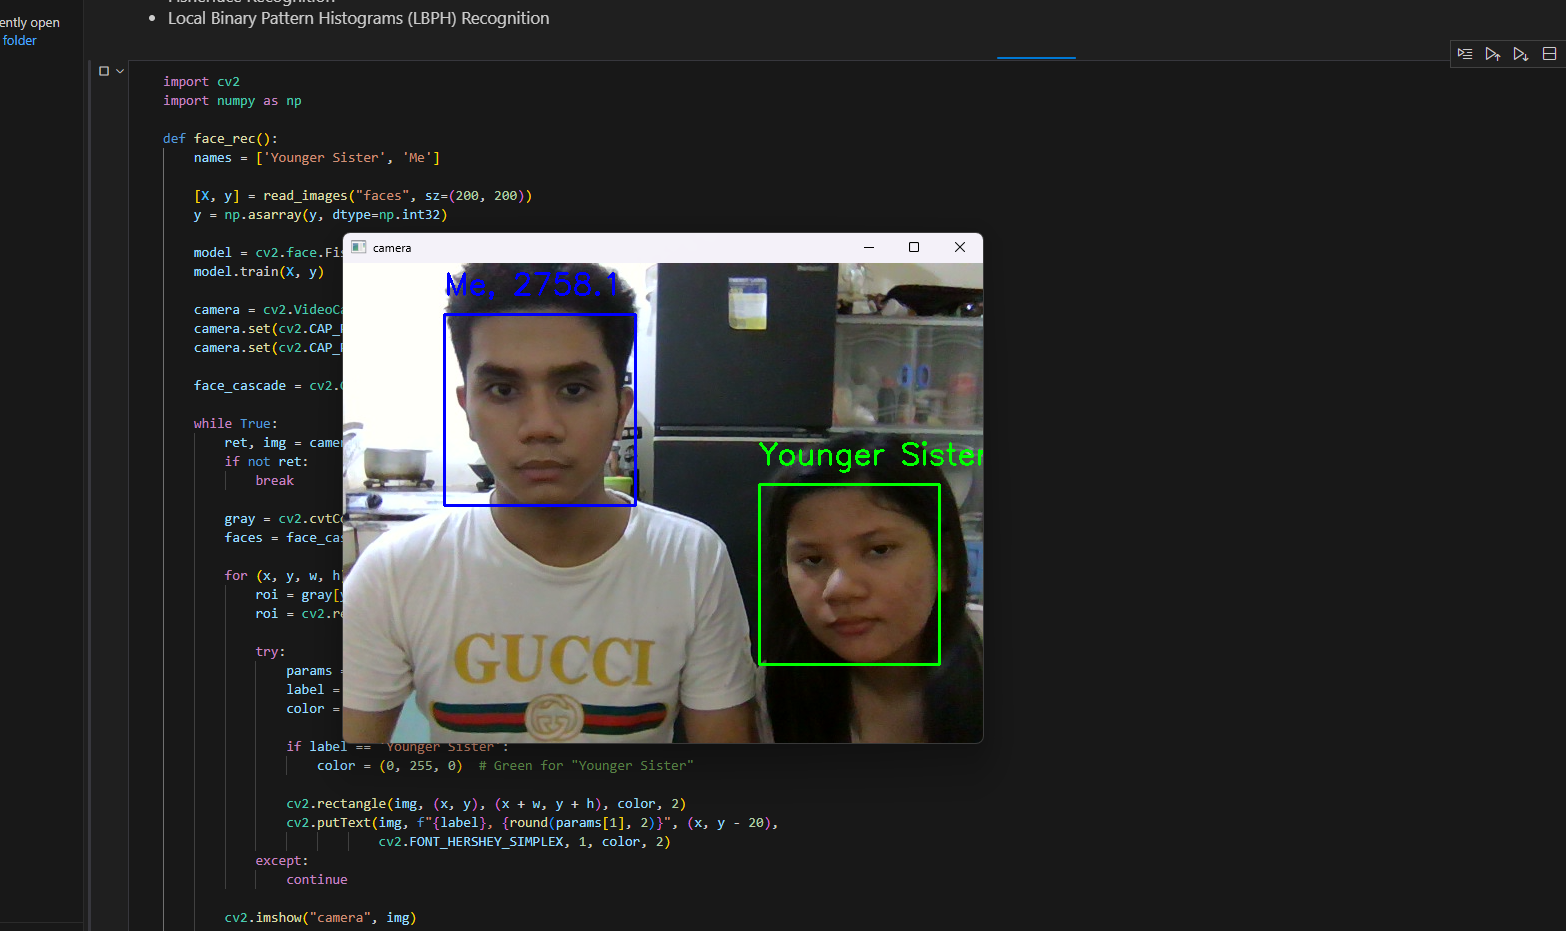

On LBPH recognition, the output is the same as that of EigenFaceRecognizer, as it does not properly recognize my sister's face. I can conclude that, out of the three, in this dataset,FisherFace is the most accurate, and the problem might lie in the brightness or contrast since we took the pictures at night, or it could be due to the number of images, even though my sister and I took 30 pictures each.

**Question: The `predict()` method returns a two-element array. Provide your analysis of the two returned values and their important ince this application.**

The predict() method returns a predicted label identifying the recognized face and a confidence score, where a lower value indicates higher confidence, making it essential for assessing recognition accuracy and potential misclassifications.

## 4. Supplementary Activity

Your accomplisment of the tasks below contribute to the achievement of ILO1, ILO2, and ILO3 for this module.

---

Tasks:
1. Create a new dataset for testing, this dataset must include the following:
  - The same person/s that the model has to recognize.
  - Different person/s that the model should not recognize.
2. For each model, perform 20 tests. Document the testing performed and provide observations.
3. Conclude on the performed tests by providing your evaluation of the performance of the models.

In [116]:
import cv2
import numpy as np
import os

def read_images(directory, sz=(200, 200)):
    X, y, labels = [], [], {}
    for i, label in enumerate(os.listdir(directory)):
        path = os.path.join(directory, label)
        if os.path.isdir(path):
            labels[label] = i
            for file in os.listdir(path):
                img = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    X.append(cv2.resize(img, sz))
                    y.append(i)
    return np.array(X, dtype=np.uint8), np.array(y, dtype=np.int32), labels

def train_model():
    X, y, labels = read_images("dataset")
    model = cv2.face.FisherFaceRecognizer_create()
    model.train(X, y)
    return model

def face_recognition():
    model = train_model()
    cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    cam = cv2.VideoCapture(0)

    while True:
        ret, img = cam.read()
        if not ret:
            break

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = cascade.detectMultiScale(gray, 1.1, 5, minSize=(50, 50))

        for (x, y, w, h) in faces:
            face = cv2.resize(gray[y:y+h, x:x+w], (200, 200))
            try:
                _, conf = model.predict(face)
                status, color = ("Recognized", (0, 255, 0)) if conf < 5000 else ("Unrecognized", (0, 0, 255))
                cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
                cv2.putText(img, status, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
            except:
                continue

        cv2.imshow("Face Recognition", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    cam.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_recognition()


## 5. Summary, Conclusions and Lessons Learned

This activity highlighted the importance of dataset preparation, model selection, and image preprocessing in face recognition. Testing different algorithms showed how factors like lighting and angles affect recognition, reinforcing the need for well-prepared training data. Overall, this allowed a deeper understanding of how face recognition systems process and classify images, which can be applied to future improvements and optimizations.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*